In [1]:
%run ../python/oana_setup.py
import rootpy as rp
#/hdd500/home/e16e1fjobssimtof/e1f/skim/friend-tkin.root

/hdd500/home/e16e1fjobssimtof/e1f/skim/3????.root
/hdd500/home/e16e1fjobssimtof/e1f/skim/3xxxx_run.root
run.lum(=l)
runb.lb(=l)
tpipf.tpilf(=lf)
h10.tpipf(=pf)
h10.run(=r)
h10.tkin(=k)
elist_fid_mm_[123]=el[123]
loaded acc.cpp
loaded fid.cpp
loaded particle-constants.h
loaded Fid instance
loaded infid.C
loaded eff.cpp
recompiling h10t3pi_sel.C...
... done.
Fid::Instance() loaded	 from /home/ephelps/copy/gmail/phys-ana-omega/fid.cpp	 with parameters from /home/ephelps/copy/gmail/phys-ana-omega/input/fid.parms
infid() loaded	 from /home/ephelps/copy/gmail/phys-ana-omega/infid.C
h10 aliases: c, mpip, bifpip, dtifpip, sf	fidpass, fidpass[e,p,pip,pim]	top[1,2,3]pass, mmthreshpass, mmpi0pass	ccpass


# open paddle-to-$\theta/p$ mapping, $\theta:p$ histograms

If htp_pip.root has not been created, scroll down to "generate $\theta:p$ histogram file" section.

In [22]:
fin_htp = ropen('htp_pip.root','read')
fin_pdl = ropen('/home/ephelps/Dropbox/h3_pdlVtVp_pip.root','read')
def drawpdl(sector, paddle, options='same'):
    h = fin_pdl['htvp_%d_pdl%d_mean'%(sector,paddle)]
    #h.Draw(options)
    f = h.GetListOfFunctions()[0]
    f.SetLineWidth(2)
    f.SetLineColor(r.kBlack)
    f.Draw(options)
    return f

# investigate

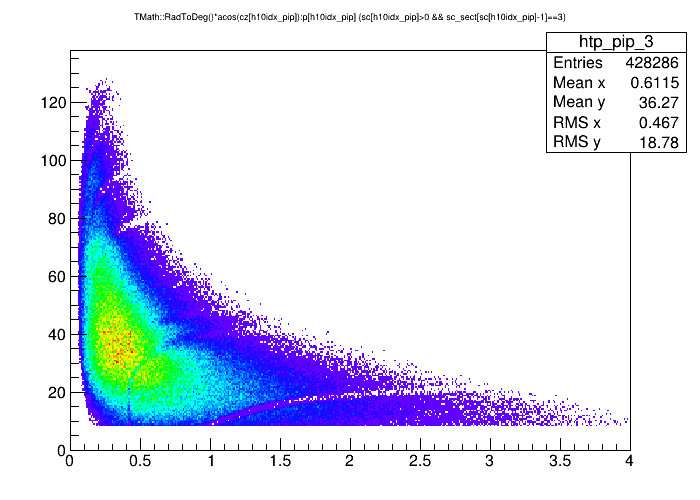

In [6]:
fin_htp.htp_pip_3 #.Draw("colz")

In [23]:
#2, 11, 24, 25, 27, 28
f311 = drawpdl(3,11)
f324 = drawpdl(3,24)
f324 = drawpdl(3,25)
f327 = drawpdl(3,27)
f324 = drawpdl(3,28)

ERROR:ROOT.TUnixSystem.DispatchSignals:segmentation violation
ERROR:stack:File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
ERROR:stack:  "__main__", fname, loader, pkg_name)
ERROR:stack:File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
ERROR:stack:  exec code in run_globals
ERROR:stack:File "/home/ephelps/.virtualenvs/py27/lib/python2.7/site-packages/IPython/kernel/__main__.py", line 3, in <module>
ERROR:stack:  app.launch_new_instance()
ERROR:stack:File "/home/ephelps/.virtualenvs/py27/local/lib/python2.7/site-packages/IPython/config/application.py", line 574, in launch_instance
ERROR:stack:  app.start()
ERROR:stack:File "/home/ephelps/.virtualenvs/py27/local/lib/python2.7/site-packages/IPython/kernel/zmq/kernelapp.py", line 373, in start
ERROR:stack:  ioloop.IOLoop.instance().start()
ERROR:stack:File "/home/ephelps/.virtualenvs/py27/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 151, in start
ERROR:stack:  super(ZMQIOLoop, self).start()
E

# sector 5 examples

Some of the $\theta:p$ structure parallel to SC paddles comes from other sub-detectors with elements running in the same direction (like EC).  So, The general approach should perhaps be to look at each sub-detector in its natural coordinate system, perform cuts, and THEN look at the $\theta:p$ distributions of experiment and simulation to see diferences.  Let's take, for example, sector 5.

## EC UVW

In [3]:
fin_uvw = ropen('uvw.root')

In [4]:
huvwS = [fin_uvw.uvw['hsf_V_%s_%d'%(coord, sector)] for sector in range(1,7) for coord in ('u','v','w')]

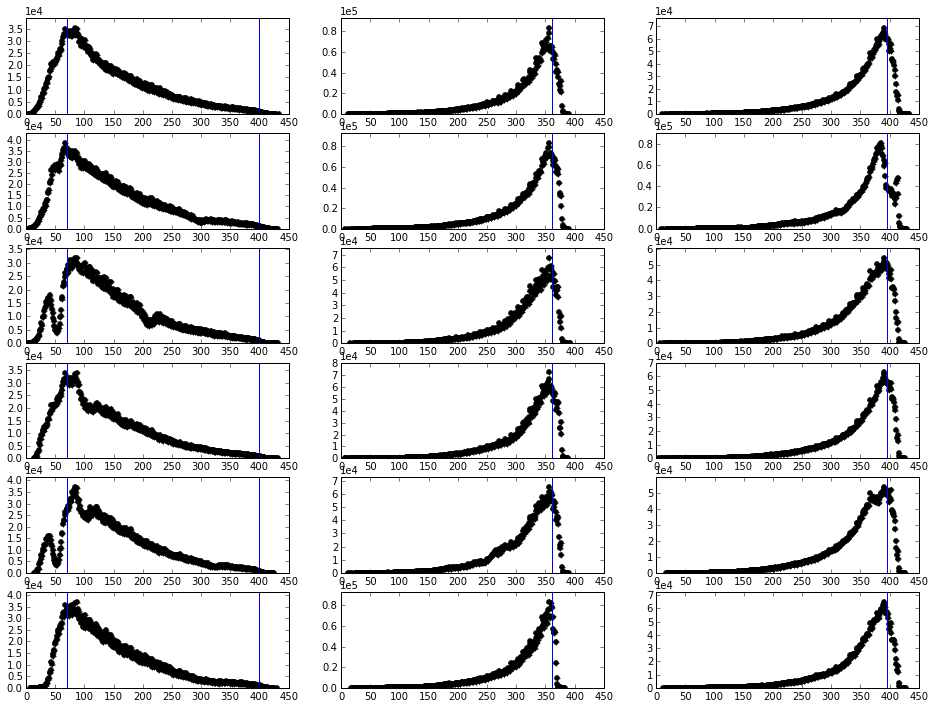

In [7]:
fig = figure(figsize=(16,12))
lines = [[70, 400], [362], [395]]*6 # [[20, 400], [375], [410]]*6
for i, h in enumerate(huvwS):
    draw(asrootpy(h.ProjectionX()), nrows=6, ncols=3, cell=i+1, fig=fig) #fhs[0][3].markercolor='r')
    for l in lines[i]: axvline(l)

The U coordinate has the most structure, because those wires run perpendicular to SC paddles -- a bad SC paddle will lower the yield at a specific U.  I'll cut along U before moving on to SC paddles, but to better see where to cut some kind of normalization will be useful.  First, look at the normalized distributions.

In [67]:
huvwS_2d = [huvwS[(i-1)*3:i*3] for i in range(1,7)]

In [111]:
huvwS_2d_b = list(np.empty((3,6), dtype=object))
for sector, hs in enumerate(huvwS_2d):
    for coord, h in enumerate(hs):
        huvwS_2d_b[coord][sector] = h.Clone('%s_b'%h.GetName())

In [165]:
colorcycle = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
hs = [map(lambda x: asrootpy(x.ProjectionX()),huvwS_2d_b[coord]) for coord in range(0,3)]
for coord, h in enumerate(hs):
    for i in range(0,6):
        h[i].markercolor='k' #colorcycle[i]

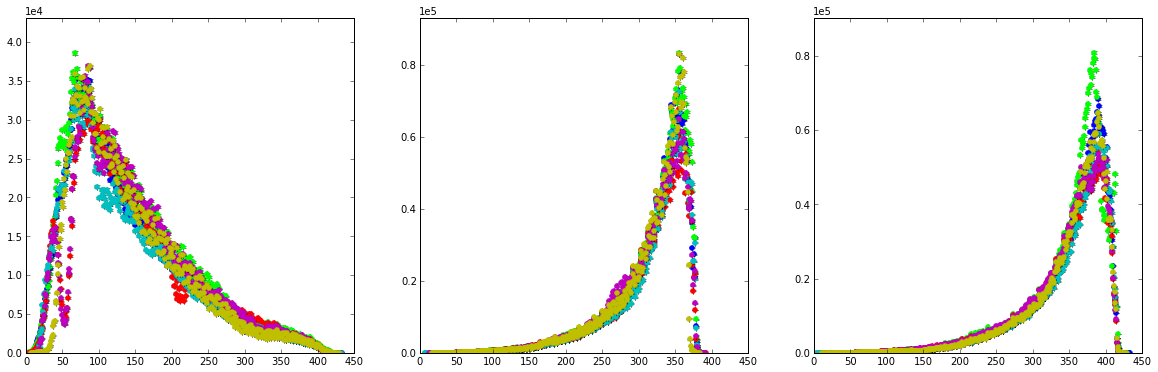

In [164]:
fig = figure(figsize=(20,6))
lines = [[20, 400], [375], [410]]*6
for coord in range(0,3):
    draw(hs[coord], ncols=3, cell=coord+1, fig=fig)

In [186]:
hs[0][4].Draw()
fpol2 = r.TF1('fpol2', 'pol2', 0, 450)
fpol2.SetParameters(56823.5, -304.585, 0.436)
fpol2.Draw('same')

# cleanup

In [18]:
[f.close() for f in [fin_htp, fin_pdl]]

[None, None]

# generate $\theta:p$ histogram file

In [3]:
import rootpy as rp

h10.SetEntryList(el1)

fout = ropen('htp_pip.root','recreate')
theta_max = 2.4*180/pi
htp_pipS = [rh1('TMath::RadToDeg()*acos(cz[h10idx_pip]):p[h10idx_pip]', 'sc[h10idx_pip]>0 && sc_sect[sc[h10idx_pip]-1]==%d'%isect, 'htp_pip_%d'%isect, binning='(400,0,4,240,0,%.0f)'%theta_max) for isect in range(1,7)]
hs_tp_pip = rp.plotting.HistStack('hs_tp_pip', '#theta versus p, #pi^{+}')
for h in htp_pipS:
    h.SetOption('col')
    h.SetDrawOption('col')
    hs_tp_pip.Add(h)

#hs_tp_pip.Draw('pads')
fout.Write()
fout.Close()

In [5]:
import rootpy as rp

h10.SetEntryList(el1)

fout = ropen('htp_p.root','recreate')
theta_max = 2.4*180/pi
htp_pS = [rh1('TMath::RadToDeg()*acos(cz[h10idx_p]):p[h10idx_p]', 'sc[h10idx_p]>0 && sc_sect[sc[h10idx_p]-1]==%d'%isect, 'htp_p_%d'%isect, binning='(400,0,4,240,0,%.0f)'%theta_max) for isect in range(1,7)]
hs_tp_p = rp.plotting.HistStack('hs_tp_p', '#theta versus p, proton')
for h in htp_pS:
    h.SetOption('col')
    h.SetDrawOption('col')
    hs_tp_p.Add(h)

#hs_tp_pip.Draw('pads')
fout.Write()
fout.Close()

# misc

In [17]:
import rootpy as rp

h10.SetEntryList(el1)
def getpdl_fromH10(sector, paddle):
    theta_max = 2.4*180/pi
    h = rh1('TMath::RadToDeg()*acos(cz[h10idx_pip]):p[h10idx_pip]',
            'sc[h10idx_pip]>0 && sc_sect[sc[h10idx_pip]-1]==%d && \
             sc_pd[sc[h10idx_pip]-1]==%d'%(sector, paddle),
            'htp_pip_%d_%d'%(sector, paddle),
            binning='(400,0,4,240,0,%.0f)'%theta_max)
    return h

In [18]:
h339 = getpdl_fromH10(3, 39)
h340 = getpdl_fromH10(3, 40)
h341 = getpdl_fromH10(3, 41)

In [19]:
h339.Draw('colz')

In [21]:
h340.Draw('colsame')

In [22]:
hsum = h339.Clone('hsum')
hsum.Add(h340)
hsum.Add(h341)
hsum.Draw('colz')

In [24]:
ctmp = rp.plotting.Canvas()

In [28]:
hpdls_s3 = rh1('dc_xsc:dc_ysc', 'sc[h10idx_pip]>0 && \
                sc_sect[sc[h10idx_pip]-1]==%d'%3, N=100000)

In [31]:
h340.Draw('colsame')